In [1]:
#!pip3 install nltk
import pandas as pd
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import re
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

REPLACE_NO_SPACE = re.compile("(____)|(&lt)|(#&gt)|(\\\)|(\.)|(\,)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
NO_SPACE = ""
SPACE = " "

data = pd.read_csv('data/spam.csv', encoding='latin-1')
y = data.v1
X = data.v2
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [2]:
print(X.head())
print(len(X))
print(y.head())

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: v2, dtype: object
5572
0     ham
1     ham
2    spam
3     ham
4     ham
Name: v1, dtype: object


In [3]:
# Utilize SVM para predecir Ham vs Spam.
# Use las tecnicas de NLP vistas en la clase y utilice SVM para realizar la estimacion!
# use cross validation y todo lo que ha aprendido en el curso!

# ANTORCHA!
# ejercicio extra: https://www.kaggle.com/c/nlp-getting-started ingrese en la competencia y envie sus resultados!

In [4]:
def get_stemmed_text(corpus):
    stemmer = PorterStemmer()
    return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]

In [5]:
def preprocess_text(reviews):
    
    reviews = [REPLACE_NO_SPACE.sub(NO_SPACE, line.lower().strip()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(SPACE, line) for line in reviews]
    
    return reviews

In [6]:
def show_confusion_matrix(model,x,y):
    disp = plot_confusion_matrix(model, x, y,
                             cmap=plt.cm.Blues,
                             normalize=None)
    plt.show()

In [7]:
cleared_text = preprocess_text(X)

In [8]:
vectorizer = CountVectorizer(ngram_range=(1, 5))
X = vectorizer.fit_transform(cleared_text)

In [9]:
vectorizer.get_feature_names()

['aa',
 'aa and',
 'aa and with',
 'aa and with exhaust',
 'aa and with exhaust hanging',
 'aah',
 'aah bless',
 'aah bless hows',
 'aah bless hows your',
 'aah bless hows your arm',
 'aah cuddle',
 'aah cuddle would',
 'aah cuddle would be',
 'aah cuddle would be lush',
 'aah speak',
 'aah speak tomo',
 'aaniye',
 'aaniye pudunga',
 'aaniye pudunga venaam',
 'aaooooright',
 'aaooooright are',
 'aaooooright are you',
 'aaooooright are you at',
 'aaooooright are you at work',
 'aathilove',
 'aathilove lot',
 'aathiwhere',
 'aathiwhere are',
 'aathiwhere are you',
 'aathiwhere are you dear',
 'ab',
 'ab sara',
 'ab sara jorge',
 'ab sara jorge shock',
 'ab sara jorge shock will',
 'abbey',
 'abbey happy',
 'abbey happy new',
 'abbey happy new year',
 'abbey happy new year abiola',
 'abdomen',
 'abdomen and',
 'abdomen and gynae',
 'abdomen and gynae infections',
 'abdomen and gynae infections even',
 'abeg',
 'abeg make',
 'abeg make profit',
 'abeg make profit but',
 'abeg make profit b

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80,random_state=42)

print('X train shape:',X_train.shape)
print('y train shape:',y_train.shape)
print('X test shape:',X_test.shape)
print('y train shape:',y_test.shape)

X train shape: (4457, 197870)
y train shape: (4457,)
X test shape: (1115, 197870)
y train shape: (1115,)


# Kernel Linear
Iniciaremos corriendo el modelo con el Kernel linear.

Accuracy Linear: 0.9757847533632287
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       1.00      0.82      0.90       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115

Cross val score: 0.9434977578475336


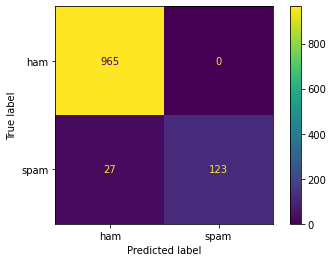

In [11]:
svm_model_linear = svm.SVC(kernel='linear')
clf_linear = svm_model_linear.fit(X_train, y_train)
linear_pred = svm_model_linear.predict(X_test)
linear_score = accuracy_score(y_test,linear_pred )
print ("Accuracy Linear:",linear_score)
plot_confusion_matrix(clf_linear, X_test, y_test)
print(classification_report(y_test, linear_pred))
print('Cross val score:',cross_val_score(clf_linear, X_test, y_test, cv=5).mean())

# Kernel polinomial

Polinomial Score 0.8860986547085202
              precision    recall  f1-score   support

         ham       0.94      1.00      0.97       965
        spam       0.97      0.56      0.71       150

    accuracy                           0.94      1115
   macro avg       0.95      0.78      0.84      1115
weighted avg       0.94      0.94      0.93      1115



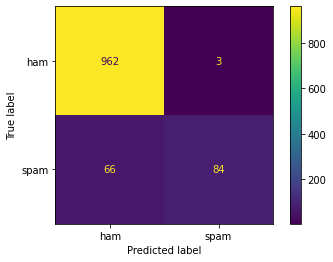

In [12]:
svm_model_poly = svm.SVC(kernel='poly',degree=2)
clf_poly = svm_model_poly.fit(X_train, y_train)
poly_predictions = svm_model_poly.predict(X_test)
poly_score = cross_val_score(clf_poly, X_test, y_test, cv=5).mean()
print ("Polinomial Score",poly_score)
plot_confusion_matrix(clf_poly, X_test, y_test)
print(classification_report(y_test, poly_predictions))

# Kernel radial

Primero buscamos el mejor valor de gamma

In [13]:
for g in ['scale','auto',2,5,50,100]:
    svm_model_radial = svm.SVC(kernel='rbf',gamma=g)
    clf_radial = svm_model_radial.fit(X_train, y_train)
    radial_predictions =  svm_model_radial.predict(X_test)
    radial_score = cross_val_score(clf_radial, X_test, y_test, cv=5).mean()
    print ("Radial score for gamma = {}".format(g),radial_score)
    print(classification_report(y_test, radial_predictions))

Radial score for gamma = scale 0.8887892376681614
              precision    recall  f1-score   support

         ham       0.95      1.00      0.98       965
        spam       1.00      0.67      0.80       150

    accuracy                           0.96      1115
   macro avg       0.98      0.84      0.89      1115
weighted avg       0.96      0.96      0.95      1115

Radial score for gamma = auto 0.865470852017937
              precision    recall  f1-score   support

         ham       0.87      1.00      0.93       965
        spam       0.00      0.00      0.00       150

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115



/Users/oscar/ml-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Radial score for gamma = 2 0.8726457399103138
              precision    recall  f1-score   support

         ham       0.90      1.00      0.95       965
        spam       1.00      0.31      0.48       150

    accuracy                           0.91      1115
   macro avg       0.95      0.66      0.71      1115
weighted avg       0.92      0.91      0.89      1115

Radial score for gamma = 5 0.8726457399103138
              precision    recall  f1-score   support

         ham       0.90      1.00      0.95       965
        spam       1.00      0.31      0.48       150

    accuracy                           0.91      1115
   macro avg       0.95      0.66      0.71      1115
weighted avg       0.92      0.91      0.89      1115

Radial score for gamma = 50 0.8726457399103138
              precision    recall  f1-score   support

         ham       0.90      1.00      0.95       965
        spam       1.00      0.31      0.48       150

    accuracy                           0.91

Como vimos el parámetro gamma = 'scale' fue el que mejor rendimiento nos dio para el Kernel radial.

Radial Score 0.8887892376681614
              precision    recall  f1-score   support

         ham       0.95      1.00      0.98       965
        spam       1.00      0.67      0.80       150

    accuracy                           0.96      1115
   macro avg       0.98      0.84      0.89      1115
weighted avg       0.96      0.96      0.95      1115



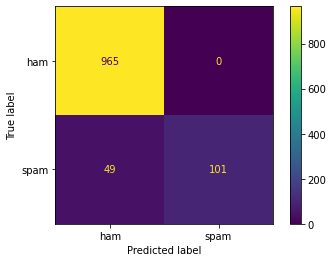

In [14]:
svm_model_radial = svm.SVC(kernel='rbf',gamma='scale')
clf_radial = svm_model_radial.fit(X_train, y_train)
radial_predictions =  svm_model_radial.predict(X_test)
radial_score = cross_val_score(clf_radial, X_test, y_test, cv=5).mean()
print ("Radial Score",radial_score)
plot_confusion_matrix(clf_radial, X_test, y_test)
print(classification_report(y_test, radial_predictions))

# Comparacion de distintos Kernels

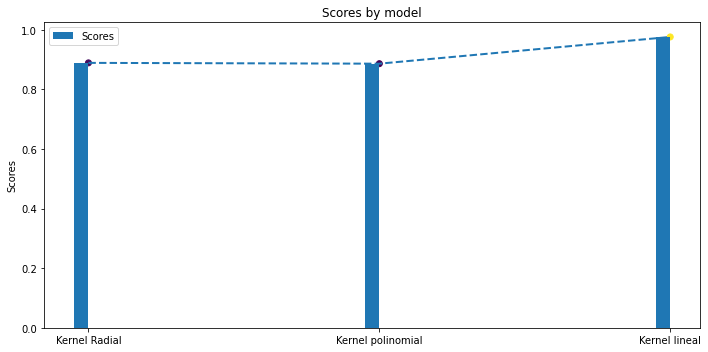

In [15]:
scores = [radial_score,poly_score,linear_score]
labels = ['Kernel Radial', 'Kernel polinomial','Kernel lineal']
width_height_1 = (10, 5)
N=20
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

x = np.arange(len(labels))
width = 0.05

fig, ax = plt.subplots(figsize=width_height_1)
rects1 = ax.bar(x - width/2, scores, width, label='Scores')

ax.set_ylabel('Scores')
ax.set_title('Scores by model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.scatter(labels,scores,c=scores,alpha=1)
plt.plot(labels,scores,alpha=1,linewidth=2.0,ls='--')
plt.show()